In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, sklearn, seaborn as sns

In [3]:
df= pd.read_csv('content/resampled_by_day_id_122.csv', parse_dates=True).set_index('timestamp')
df.head()

,meter_reading,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,day,month
timestamp,,,,,,,,
2016-01-01,262.495833,5.387500,3.879167,1016.941667,116.666667,4.470833,1.0,1.0
2016-01-02,251.508333,9.783333,9.183333,998.087500,166.666667,7.241667,2.0,1.0
2016-01-03,258.395833,7.954167,6.687500,991.837500,187.916667,5.633333,3.0,1.0
2016-01-04,281.604167,7.841667,6.508333,982.766667,177.083333,4.145833,4.0,1.0
2016-01-05,279.154167,7.904167,7.058333,984.712500,175.416667,2.750000,5.0,1.0


# Scaling the data

In [5]:
from sklearn import preprocessing

In [7]:
scaler= preprocessing.MinMaxScaler()
# only scaling the numerical values not day/month
scaled_data=scaler.fit_transform(df.drop(columns=['day','month']))

In [8]:
type(scaled_data)

numpy.ndarray

adding the day/month again, and constructing a df

In [13]:
scaled_df= pd.concat( [ pd.DataFrame(scaled_data, index=df.index , columns=df.columns[:-2]) , df.iloc[:,-2:] ] 
                     , axis=1 )
scaled_df.head()

,meter_reading,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,day,month
timestamp,,,,,,,,
2016-01-01,0.277567,0.202493,0.345762,0.559978,0.29250,0.316185,1.0,1.0
2016-01-02,0.208450,0.373260,0.577301,0.251041,0.44250,0.565903,2.0,1.0
2016-01-03,0.251776,0.302201,0.468352,0.148631,0.50625,0.420954,3.0,1.0
2016-01-04,0.397767,0.297831,0.460531,0.000000,0.47375,0.286894,4.0,1.0
2016-01-05,0.382355,0.300259,0.484540,0.031884,0.46875,0.161097,5.0,1.0


# Creating training and testing and validation

In [14]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_hidden,y_train,y_hidden= train_test_split( scaled_df.drop(columns='meter_reading') ,
                                                    scaled_df.meter_reading,
                                                    test_size=0.2,
                                                    shuffle=False )

In [25]:
assert len(y_train) ==len(x_train)

we are good to go now

In [26]:
x_test,x_val,y_test,y_val= train_test_split(x_hidden,y_hidden,
                                             test_size=0.5,
                                             shuffle=False)

## we have now:

1.   x_train & y_train
2.   x_test & y_test
3.   x_val & y_val



# Creating simple models

In [29]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [30]:
lasso_model= Lasso( alpha=0.3 )
lasso_model.fit(x_train , y_train )
lasso_pred= lasso_model.predict( x_test )

print( mean_squared_error( y_test , lasso_pred) )

0.01865278609719026


## Clearly we can see that linear models only use the mean as the predicted value

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='meter_reading'>

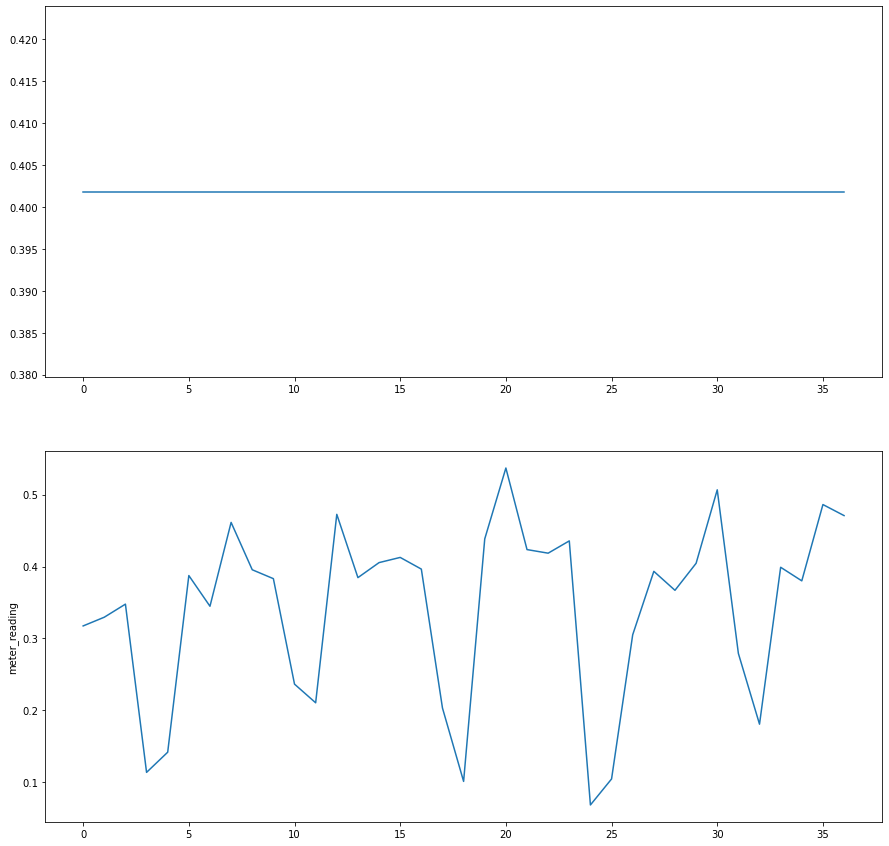

In [32]:
_, axs=plt.subplots(2,1, figsize=(15,15))
sns.lineplot( range(len(x_test)) , lasso_pred, ax=axs[0] )
sns.lineplot( range(len(x_test)) , y_test, ax=axs[1] )

# let's try more soffisticated models

In [33]:
from sklearn.ensemble import RandomForestRegressor

forrest_model= RandomForestRegressor()
forrest_model.fit(x_train , y_train )
forrest_pred= forrest_model.predict( x_test )

print( mean_squared_error( y_test , forrest_pred) )

0.016902955428210464


## Let's try to plot it


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='meter_reading'>

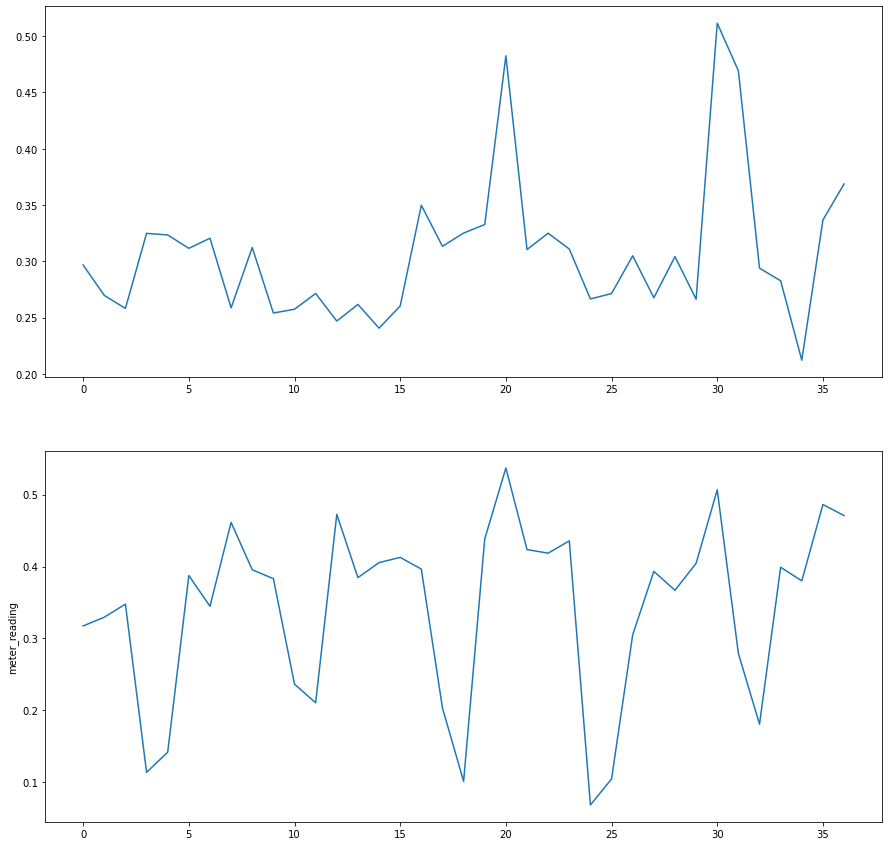

In [34]:
_, axs=plt.subplots(2,1, figsize=(15,15))
sns.lineplot( range(len(x_test)) , forrest_pred, ax=axs[0] )
sns.lineplot( range(len(x_test)) , y_test, ax=axs[1] )

we can see that the output is not linear, but still not effecient enough

# last try with powerful model


In [38]:
from sklearn.ensemble import GradientBoostingRegressor

0.02296097538875233


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='meter_reading'>

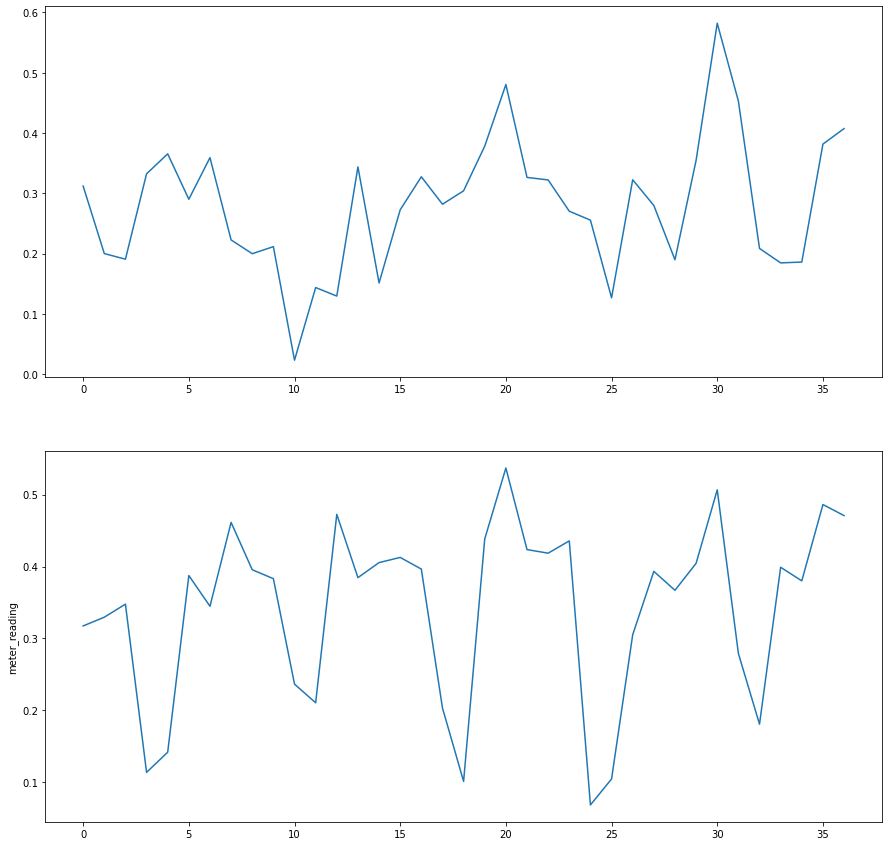

In [39]:
gradient_model= GradientBoostingRegressor( n_estimators=1000)

gradient_model.fit(x_train , y_train )
gradient_pred= gradient_model.predict( x_test )

print( mean_squared_error( y_test , gradient_pred) )

_, axs=plt.subplots(2,1, figsize=(15,15))
sns.lineplot( range(len(x_test)) , gradient_pred, ax=axs[0] )
sns.lineplot( range(len(x_test)) , y_test, ax=axs[1] )

# and we can see now that we need sequential models

## let's save the data so that we work with a standard version

In [45]:
list_of_df= [x_train , y_train,
            x_test , y_test,
            x_val , y_val]

list_of_df_names= ['x_train' , 'y_train',
                    'x_test' , 'y_test',
                    'x_val' , 'y_val']

for i, frame in enumerate(list_of_df):
    frame.to_csv( f'content/{list_of_df_names[i]}.csv')